梯度下降的分类：BGD:批量梯度下降  MBGD:小批量梯度下降   SGD:随机梯度下降

三种梯度下降不同，体现在第二步中：
* BGD是指在**每次迭代**使用**所有样本**来进行梯度的更新
* MBGD是指在**每次迭代**使用**一部分样本**（所有样本500个，使用其中32个样本）来进行梯度的更新

* SGD是指**每次迭代**随机选择**一个样本**来进行梯度更新

### BGD批量梯度下降

#### 一元一次线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 定义X np.random.rand：返回一个或者一组(0,1)之间的随机值
X = np.random.rand(100, 1)
X[:5]

array([[0.34645968],
       [0.73485515],
       [0.01509344],
       [0.40871906],
       [0.99144737]])

In [15]:
"""
定义w,b，w为斜率也叫做权重，b为截距也叫做偏置值
这个两个值是随机的,用来构建线程方程
w,b为随机生成的斜率和截距
"""
w, b = np.random.randint(1, 10, size=2)
w, b

(6, 1)

In [4]:
"""
np.random.randn:正态分布，也叫高斯分布
np.random.randn(params1, params2, params3)
    params1: 行
    params2: 列
    params3: 维度 默认的维度为2维，可以使用shape查看维度
这里使用正态的分布的原因是，是为了模拟真实的数据，加上噪声。如果不加上正态分布，数据就是完全正确的，但是没有完整准确的数据
"""
# 回归方程
y=w * X + b + np.random.randn(100, 1)
y[:10]

array([[7.09007129],
       [7.18617744],
       [6.06732477],
       [7.98869333],
       [8.65332852],
       [6.00546605],
       [9.04769229],
       [6.65561855],
       [4.71221463],
       [5.67799238]])

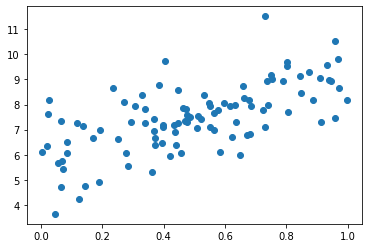

In [5]:
plt.scatter(X, y)

In [6]:
# plt.show(X, y)

In [7]:
# b作为偏置值也是截距,用来更新X 
# np.full 快速构建一个数组，对数组中的值通过fill_value进行填充 这个拼接只可运行一次
# concatenate 进行一个拼接
X = np.concatenate([X, np.full(shape=(100,1), fill_value=1)], axis=1)
X[:10]

array([[0.73122384, 1.        ],
       [0.43382868, 1.        ],
       [0.45678697, 1.        ],
       [0.6314936 , 1.        ],
       [0.97145892, 1.        ],
       [0.6486051 , 1.        ],
       [0.91063296, 1.        ],
       [0.16976543, 1.        ],
       [0.06550324, 1.        ],
       [0.05433393, 1.        ]])

thea计算公式：$\theta^{n + 1} = \theta^{n} - \eta * X^T(X\theta -y)$

根据这个公式计算thea，也就是梯度值，需要先给出X， y的值

In [11]:
epochs = 10000 # 循环的次数
eca = 0.001   # 学习率
# 定义一个函数来调整学习率
"""
定义一个函数来调整学习率，随着梯度的次数增加，学习率逐渐减小
"""
to, t1=5, 1000
def learning_rate_schedule(t):
    return to/(t+t1)
# 指定需要求的值thea 求解的系数，随机生成 这个也就是线性回归预测的w,b的值
thea = np.random.randn(2, 1)
t = 0
for i in range(epochs):
    # 计算出thea的值，也就可以得到预测后的w,b的值
    # ① 首先需要计算出导函数的值
    g = X.T.dot(X.dot(thea)-y)
    eca = learning_rate_schedule(t)
    thea = thea - eca * g  # 最终的系数
    t += 1
print('真实的w,b是', w,b)
print('BGD的预测的w,b为', thea)

真实的w,b是 3 6
BGD的预测的w,b为 [[3.17640294]
 [5.91535903]]


In [16]:
from sklearn.linear_model import SGDRegressor

In [31]:
'np.c_'
"""
np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
"""
b = np.c_[X,np.ones((100, 1))]


In [33]:
b[:5]

array([[0.73122384, 1.        , 1.        , 1.        ],
       [0.43382868, 1.        , 1.        , 1.        ],
       [0.45678697, 1.        , 1.        , 1.        ],
       [0.6314936 , 1.        , 1.        , 1.        ],
       [0.97145892, 1.        , 1.        , 1.        ]])

In [38]:
a = np.ones((100, 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [47]:
c = np.random.randn(100,1)
c[:5]

array([[ 0.46463118],
       [-0.61606066],
       [ 0.97028123],
       [ 0.15284514],
       [ 0.64623788]])

In [48]:
np.r_[c,a]

array([[ 0.46463118],
       [-0.61606066],
       [ 0.97028123],
       [ 0.15284514],
       [ 0.64623788],
       [ 0.35562359],
       [-0.78427468],
       [-0.49905378],
       [-1.49087629],
       [-0.49038687],
       [ 0.16966649],
       [-0.36386222],
       [-2.02947062],
       [-2.07936986],
       [ 1.86988323],
       [ 0.48164915],
       [-0.75866611],
       [-1.53755793],
       [ 0.45605667],
       [-1.27507312],
       [-0.40915435],
       [ 0.5811602 ],
       [ 1.87792156],
       [-1.06279875],
       [-1.11873029],
       [-1.85865852],
       [-1.55401233],
       [ 0.66767523],
       [-1.44424691],
       [-2.70417315],
       [-0.98141906],
       [ 0.17916621],
       [-0.20271171],
       [-1.00145556],
       [ 0.4912824 ],
       [ 0.01203172],
       [ 2.97843261],
       [-0.25654281],
       [ 1.00055078],
       [-0.73270705],
       [ 0.16934885],
       [-0.03788592],
       [-0.15538886],
       [ 0.71277391],
       [-0.88878183],
       [-0

In [2]:
import numpy as np
np.set_printoptions(suppress=True)
np.random.randn(100, 10)

array([[ 0.68503822,  0.37642813, -0.03313617, -0.47339285,  0.43099632,
        -1.35868479,  0.81280131,  0.48615573, -1.57898251,  0.35048832],
       [ 0.26607726, -0.10506237,  1.51857141, -1.16574054,  1.06865868,
         0.96865245,  0.70395546, -1.9252748 ,  0.89457007,  1.13537676],
       [-0.66008294, -0.93242551,  0.87649272,  0.25324369, -1.9898386 ,
         0.33098789, -0.30215489,  0.12978921, -1.38867486,  0.62339078],
       [ 0.67150495,  1.67689437, -1.39309213, -2.04321747, -0.06584995,
        -0.23246194, -1.36697977,  0.55457587, -0.30805177,  1.19836646],
       [ 1.67902326, -1.09152422, -0.41960397, -0.24506391,  0.26271909,
        -0.10871368, -0.64385396, -1.28349878,  0.00272443,  0.92278729],
       [ 0.46929332, -0.44374729, -0.12600778,  0.56247523,  0.87067927,
         1.53513385,  1.13492964,  0.93343315, -0.66647087, -1.22934708],
       [-0.46349707,  0.55788627,  0.45257335, -1.24418097,  0.61378472,
        -1.17792363,  0.37050756,  0.18471736